<a href="https://colab.research.google.com/github/prasanndesai94/PrasannDesaiUmass/blob/main/knn_589_prasann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn.model_selection as sk
import sklearn

In [ ]:
import numpy as np
model_accuracies = np.zeros((20,52))
test_accuracies = np.zeros((20,52))

In [ ]:
iris_data = pd.read_csv("https://people.cs.umass.edu/~bsilva/courses/CMPSCI_589/Spring2022/homeworks/datasets/iris.csv")

In [ ]:
iris_data.columns = ['sepal_l','sepal_w','petal_l','petal_w','flower_species']
column_list = iris_data.columns.tolist()
column_list.remove('flower_species')

In [ ]:
for round in range (0,20):
  iris_data_s = sklearn.utils.shuffle(iris_data)
  iris_data_train, iris_data_test = sk.train_test_split(iris_data_s, train_size = 0.8, test_size = 0.2)

  iris_data_train_norm = iris_data_train.copy()
  iris_data_test_norm = iris_data_test.copy()
  
  for k in column_list:
    max_val = iris_data_train[k].max()
    min_val = iris_data_train[k].min()
    iris_data_train_norm[k] = (iris_data_train[k] - min_val)/(max_val - min_val) 
    iris_data_test_norm[k] = (iris_data_test[k] - min_val)/(max_val - min_val)


  iris_data_train_norm = iris_data_train_norm.reset_index()
  tdc = iris_data_train_norm.copy()

  iris_data_test_norm = iris_data_test_norm.reset_index()
  tdc_test = iris_data_train_norm.copy()
 
  output_classes = []

  output_classes_test = []

  for k in range (1,52,2):
    for t in range (0,iris_data_train_norm.shape[0]):
      distances = np.zeros ((iris_data_train_norm.shape[0],1))
      for i in range (0,iris_data_train_norm.shape[0]):
        distances [i] = np.sqrt(
            ((tdc["sepal_l"][t] - iris_data_train_norm["sepal_l"][i]) **2) +
            ((tdc["sepal_w"][t] - iris_data_train_norm["sepal_w"][i]) **2) + 
            ((tdc["petal_l"][t] - iris_data_train_norm["petal_l"][i]) **2) + 
            ((tdc["petal_w"][t] - iris_data_train_norm["petal_w"][i]) **2)
          )
      tdc ["distance"] = distances
      # tdc_temp = tdc [tdc.distance > 0]
      tdc_temp = tdc
      k_nearest_classes = tdc_temp.nsmallest(k,'distance')['flower_species']
      output_classes.append(k_nearest_classes.mode()[0])

    tdc ["predicted_species"] = output_classes
    output_classes = []
    train_accuracy_k = np.sum(np.where(tdc['flower_species'] == tdc ['predicted_species'],1,0))/tdc.shape[0]
    model_accuracies [round][k] = train_accuracy_k

  # Testing data

  for k2 in range (1,52,2):
    for t2 in range (0,iris_data_test_norm.shape[0]):
      distances = np.zeros ((iris_data_train_norm.shape[0],1))
      for i2 in range (0,iris_data_train_norm.shape[0]):
        distances [i2] = np.sqrt(
            ((tdc_test["sepal_l"][i2] - iris_data_test_norm["sepal_l"][t2]) **2) +
            ((tdc_test["sepal_w"][i2] - iris_data_test_norm["sepal_w"][t2]) **2) + 
            ((tdc_test["petal_l"][i2] - iris_data_test_norm["petal_l"][t2]) **2) + 
            ((tdc_test["petal_w"][i2] - iris_data_test_norm["petal_w"][t2]) **2)
          )
      tdc_test ["distance"] = distances
      # tdc_temp_test = tdc_test [tdc_test.distance > 0]
      tdc_temp_test = tdc_test
      k_nearest_classes_test = tdc_temp_test.nsmallest(k2,'distance')['flower_species']
      output_classes_test.append(k_nearest_classes_test.mode()[0])

    # tdc_test ["predicted_species"] = output_classes_test
    # output_classes_test = []
    # test_accuracy_k = np.sum(np.where(tdc_test['flower_species'] == tdc_test ['predicted_species'],1,0))/tdc_test.shape[0]
    # test_accuracies [round][k2] = test_accuracy_k

    iris_data_test_norm ["predicted_species"] = output_classes_test
    output_classes_test = []
    test_accuracy_k = np.sum(np.where(iris_data_test_norm['flower_species'] == iris_data_test_norm ['predicted_species'],1,0))/iris_data_test_norm.shape[0]
    test_accuracies [round][k2] = test_accuracy_k



In [ ]:
k_values = []
avg_train_accuracies = []
avg_test_accuracies = []
# training_rounds_accuracies = []
# testing_rounds_accuracies = []
std_train_accuracies = []
std_test_accuracies = []
for k3 in range(1,52,2):
  k_values.append(k3)
  sum_train = 0
  sum_test = 0
  training_rounds_accuracies = []
  testing_rounds_accuracies = []
  for k4 in range(0,20):
    sum_train = sum_train + model_accuracies[k4][k3]
    sum_test = sum_test + test_accuracies[k4][k3]
    training_rounds_accuracies.append(model_accuracies[k4][k3])
    testing_rounds_accuracies.append(test_accuracies[k4][k3])

  std_train_accuracies.append(np.std(training_rounds_accuracies))
  std_test_accuracies.append(np.std(testing_rounds_accuracies))

  avg_train_accuracies.append(sum_train/20)
  avg_test_accuracies.append(sum_test/20)

In [ ]:
# std_test_accuracies

In [ ]:
import matplotlib.pyplot as plt

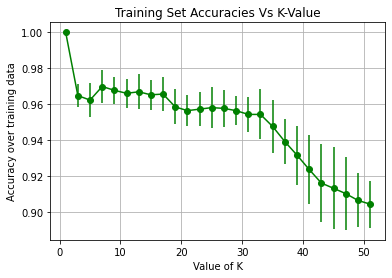

In [ ]:
# plt.plot(k_values,avg_train_accuracies,color='green',marker='o')
plt.errorbar(k_values,avg_train_accuracies,yerr=std_train_accuracies,color='green',marker='o')
plt.title('Training Set Accuracies Vs K-Value')
plt.xlabel('Value of K')
plt.ylabel('Accuracy over training data')
plt.grid(True)
plt.show()

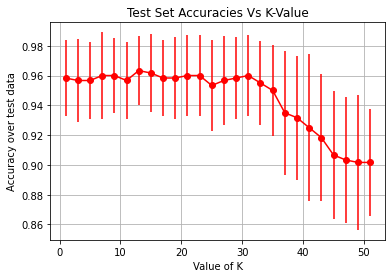

In [ ]:
plt.errorbar(k_values,avg_test_accuracies,yerr=std_test_accuracies,color='red',marker='o')
plt.title('Test Set Accuracies Vs K-Value')
plt.xlabel('Value of K')
plt.ylabel('Accuracy over test data')
plt.grid(True)
plt.show()

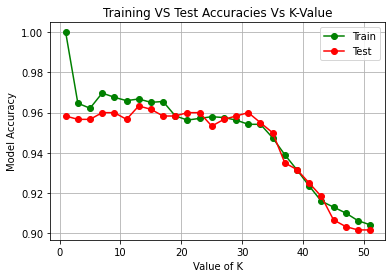

In [ ]:
plt.plot(k_values,avg_train_accuracies,color='green',marker='o', label = "Train")
plt.plot(k_values,avg_test_accuracies,color='red',marker='o', label = "Test")
# plt.errorbar(k_values,avg_train_accuracies,yerr=std_train_accuracies,color='green',marker='o')
plt.title('Training VS Test Accuracies Vs K-Value')
plt.xlabel('Value of K')
plt.ylabel('Model Accuracy')
plt.grid(True)
plt.legend()
plt.show()